<a href="https://colab.research.google.com/github/22491A0469/osis/blob/main/Unemployment_Analysis_with_Pythonipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Columns in data1: Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')
Columns in data2: Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')


<ipython-input-4-e4a6aecab07b>:30: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data1[date_column_name_data1] = pd.to_datetime(data1[date_column_name_data1], errors='coerce')
<ipython-input-4-e4a6aecab07b>:31: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data2[date_column_name_data2] = pd.to_datetime(data2[date_column_name_data2], errors='coerce')


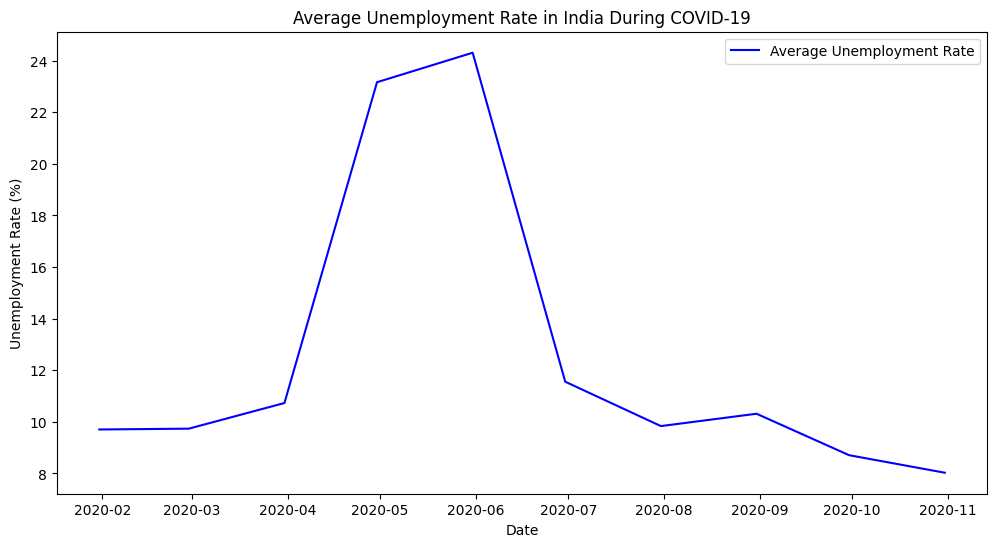

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
data_file1_path = '/content/Unemployment in India.csv'
data_file2_path = '/content/Unemployment_Rate_upto_11_2020.csv'

data1 = pd.read_csv(data_file1_path)
data2 = pd.read_csv(data_file2_path)

# Print the column names of both DataFrames to identify the correct date column name
print("Columns in data1:", data1.columns)
print("Columns in data2:", data2.columns)

# Replace 'Date' with the actual date column name from your CSV files
# For example, if the date column in data1 is 'Month', use:
# Inspecting the column names printed above, it seems the date column is likely ' Date'
date_column_name_data1 = ' Date'  # Replace with the actual column name ' Date'
date_column_name_data2 = ' Date'  # Replace with the actual column name ' Date'

# **ADJUSTMENT:** Access the column using the actual name from the DataFrame
# The column name might have extra spaces or a slightly different format.
# Assuming the actual column name is 'Estimated Unemployment Rate (%)' based on the KeyError
# But please adjust this to the actual column name if it is different in your dataset
unemployment_rate_column_data1 = data1.columns[data1.columns.str.contains('Estimated Unemployment Rate', case=False)][0]
unemployment_rate_column_data2 = data2.columns[data2.columns.str.contains('Estimated Unemployment Rate', case=False)][0]


# Convert the date columns to datetime format using the correct column names
data1[date_column_name_data1] = pd.to_datetime(data1[date_column_name_data1], errors='coerce')
data2[date_column_name_data2] = pd.to_datetime(data2[date_column_name_data2], errors='coerce')

# Basic data cleaning: Drop rows with missing unemployment rates
# **ADJUSTMENT:** Use the identified column name for dropna
data1 = data1.dropna(subset=[unemployment_rate_column_data1])
data2 = data2.dropna(subset=[unemployment_rate_column_data2])

# Combine the datasets for a complete view (optional if they have overlapping regions and dates)
data_combined = pd.concat([data1, data2], ignore_index=True)

# Filter data for the COVID-19 period (e.g., starting from January 2020)
# Use the correct date column name in the filter condition
covid_period_data = data_combined[data_combined[date_column_name_data1] >= '2020-01-01']

# Group by date to calculate the average unemployment rate across regions
# Use the correct date column name for grouping
covid_period_avg = covid_period_data.groupby(date_column_name_data1)[unemployment_rate_column_data1].mean()  # Use unemployment_rate_column_data1

# Plotting the trend
plt.figure(figsize=(12, 6))
plt.plot(covid_period_avg.index, covid_period_avg.values, label='Average Unemployment Rate', color='blue')
plt.title('Average Unemployment Rate in India During COVID-19')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.show()